## CPE 4903 - Cats and Dogs ##

## HW Part I - Import data ##
Produce the labeled data matrices X and Y by reading all 25000 images in the "train" folder. 
* You can download the photos folders from Kaggle: https://www.kaggle.com/c/dogs-vs-cats. 
* Download train.zip and unzip the 25000 files and move them to a folder and note the file path. For example, mine was
  C:\Users\haiho\Dropbox\_Professor\ECE\_fall 2020\CPE4903\Animals\train 
* You can use the functions provided in this notebook
* hint: You can use following loop command to loop through all the files: "for i,image_file in enumerate(images) :"
* Use train_test_split (with randomization) to split the data between train and test at 80/20. Be vigilant and verify the dimensions of X,Y throughout
* Display the resulting data matrices that should look like the following:
    - Shape of X_train is: (12288, 20000)
    - Shape of X_test is: (12288, 5000)
    - Shape of Y_train is: (1, 20000)
    - Shape of Y_test is: (1, 5000)
* Display the first 5 values of X_train and Y_train

In [2]:
import os, cv2, itertools # cv2 -- OpenCV
import numpy as np 
import pandas as pd 
import time
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential
import keras
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
# Your Part I code here. Print the shapes of all X's and Y's
data = np.load(r'C:\Users\c3myb\OneDrive\Documents\Juypter Notebook HW Files\CPE 4903\Cat and Dog [Keras Edition]\cats_equal_1.npz')
#Cats = 1, Dogs = 0

In [4]:
data.files

['arr_0', 'arr_1', 'arr_2', 'arr_3']

## HW Part II - Manual Binary Classification Algorithm ##
Use the equations below, which was implemented in your previous assignment of classifying the unit circle to implement the cat/dog classification using the data generated in part I. 
<div>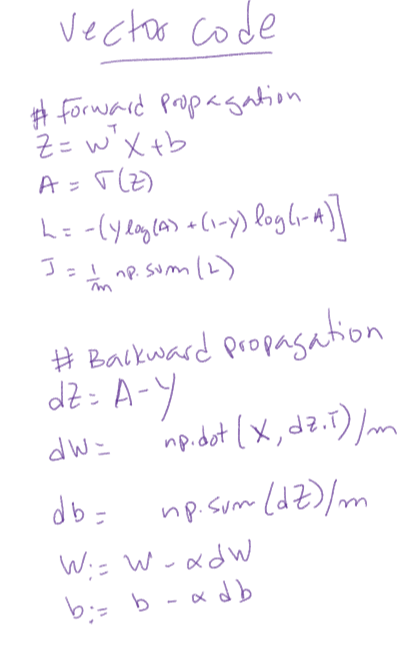<div>
    
Your successful run of the LoR algorithm on the images should show a converging cost function similar to shown below:
<div>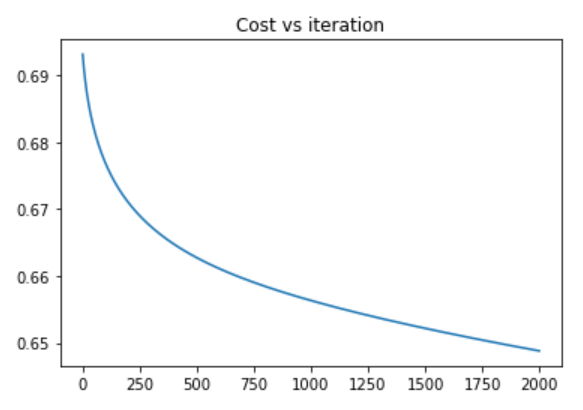<div>

Your train and test accuracy should be in the low 60%'s
* Plot your cost function
* Calculate and print your train and test accuracy (used command from previous assignment - circle)
* Show results of classifying a new downloaded image of cat or dog (maybe correct or incorrect, try several)


In [5]:
epoch = 3000
alpha = 1

nx = 12288
m = 20000

X_train = data['arr_0'].T
X_test = data['arr_1'].T
Y_train = data['arr_2'].flatten()
Y_test = data['arr_3'].flatten()

Y_train = Y_train.flatten()


model = Sequential()
model.add(Dense(units=8,activation='relu',input_dim=nx)) 
model.add(Dense(units=16,activation='relu'))
model.add(Dense(units=16,activation='relu'))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

sgd=tf.keras.optimizers.SGD(learning_rate=alpha)  # add tf in front
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

print(model.summary())
history = model.fit(X_train,Y_train,epochs=epoch,batch_size=1000,verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 98312     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

20/20 [==============================] - 0s 23ms/step - loss: 0.6689 - accuracy: 0.5943
Epoch 69/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.6666 - accuracy: 0.5997
Epoch 70/3000
20/20 [==============================] - 0s 23ms/step - loss: 0.6747 - accuracy: 0.5824
Epoch 71/3000
20/20 [==============================] - 0s 23ms/step - loss: 0.6681 - accuracy: 0.5954
Epoch 72/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.6672 - accuracy: 0.5956
Epoch 73/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.6695 - accuracy: 0.5928
Epoch 74/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.6669 - accuracy: 0.5986
Epoch 75/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.6636 - accuracy: 0.6028
Epoch 76/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.6699 - accuracy: 0.5925
Epoch 77/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.6759 - accuracy: 0

Epoch 148/3000
20/20 [==============================] - 0s 24ms/step - loss: 0.6461 - accuracy: 0.6332
Epoch 149/3000
20/20 [==============================] - 0s 25ms/step - loss: 0.6485 - accuracy: 0.6276
Epoch 150/3000
20/20 [==============================] - 1s 25ms/step - loss: 0.6469 - accuracy: 0.6335
Epoch 151/3000
20/20 [==============================] - 1s 26ms/step - loss: 0.6513 - accuracy: 0.6231
Epoch 152/3000
20/20 [==============================] - 0s 25ms/step - loss: 0.6567 - accuracy: 0.6149
Epoch 153/3000
20/20 [==============================] - 0s 25ms/step - loss: 0.6505 - accuracy: 0.6255
Epoch 154/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.6649 - accuracy: 0.6047
Epoch 155/3000
20/20 [==============================] - 0s 24ms/step - loss: 0.6522 - accuracy: 0.6238
Epoch 156/3000
20/20 [==============================] - 0s 24ms/step - loss: 0.6531 - accuracy: 0.6212
Epoch 157/3000
20/20 [==============================] - 0s 25ms/step - lo

20/20 [==============================] - 0s 23ms/step - loss: 0.6376 - accuracy: 0.6405
Epoch 228/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.6437 - accuracy: 0.6363
Epoch 229/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.6358 - accuracy: 0.6507
Epoch 230/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.6427 - accuracy: 0.6388
Epoch 231/3000
20/20 [==============================] - 0s 23ms/step - loss: 0.6345 - accuracy: 0.6479
Epoch 232/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.6423 - accuracy: 0.6413
Epoch 233/3000
20/20 [==============================] - 0s 23ms/step - loss: 0.6321 - accuracy: 0.6546
Epoch 234/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.6541 - accuracy: 0.6284
Epoch 235/3000
20/20 [==============================] - 0s 24ms/step - loss: 0.6395 - accuracy: 0.6385
Epoch 236/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.6369 - ac

20/20 [==============================] - 0s 22ms/step - loss: 0.6351 - accuracy: 0.6484
Epoch 307/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.6298 - accuracy: 0.6586
Epoch 308/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.6264 - accuracy: 0.6594
Epoch 309/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.6309 - accuracy: 0.6525
Epoch 310/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.6312 - accuracy: 0.6597
Epoch 311/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.6296 - accuracy: 0.6525
Epoch 312/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.6395 - accuracy: 0.6475
Epoch 313/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.6260 - accuracy: 0.6579
Epoch 314/3000
20/20 [==============================] - 0s 23ms/step - loss: 0.6372 - accuracy: 0.6529
Epoch 315/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.6274 - ac

20/20 [==============================] - 0s 22ms/step - loss: 0.6347 - accuracy: 0.6506
Epoch 386/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.6300 - accuracy: 0.6557
Epoch 387/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.6213 - accuracy: 0.6691
Epoch 388/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.6201 - accuracy: 0.6721
Epoch 389/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.6150 - accuracy: 0.6747
Epoch 390/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.6169 - accuracy: 0.6715
Epoch 391/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.6132 - accuracy: 0.6775
Epoch 392/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.6189 - accuracy: 0.6646
Epoch 393/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.6190 - accuracy: 0.6623
Epoch 394/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.6315 - ac

20/20 [==============================] - 0s 22ms/step - loss: 0.6216 - accuracy: 0.6640
Epoch 465/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.6221 - accuracy: 0.6580
Epoch 466/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.6132 - accuracy: 0.6701
Epoch 467/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.6153 - accuracy: 0.6675
Epoch 468/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.6063 - accuracy: 0.6797
Epoch 469/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.6132 - accuracy: 0.6751
Epoch 470/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.6139 - accuracy: 0.6772
Epoch 471/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.6161 - accuracy: 0.6678
Epoch 472/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.6068 - accuracy: 0.6793
Epoch 473/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.6243 - ac

20/20 [==============================] - 0s 22ms/step - loss: 0.6109 - accuracy: 0.6798
Epoch 544/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.6060 - accuracy: 0.6804
Epoch 545/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5981 - accuracy: 0.6826
Epoch 546/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5973 - accuracy: 0.6862
Epoch 547/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.6080 - accuracy: 0.6799
Epoch 548/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.6169 - accuracy: 0.6668
Epoch 549/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5981 - accuracy: 0.6873
Epoch 550/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.6079 - accuracy: 0.6735
Epoch 551/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.6073 - accuracy: 0.6754
Epoch 552/3000
20/20 [==============================] - 0s 23ms/step - loss: 0.6087 - ac

20/20 [==============================] - 0s 22ms/step - loss: 0.6122 - accuracy: 0.6729
Epoch 623/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5954 - accuracy: 0.6880
Epoch 624/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5990 - accuracy: 0.6834
Epoch 625/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.6027 - accuracy: 0.6851
Epoch 626/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5986 - accuracy: 0.6823
Epoch 627/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5905 - accuracy: 0.6945
Epoch 628/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5985 - accuracy: 0.6841
Epoch 629/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.6056 - accuracy: 0.6805
Epoch 630/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.6090 - accuracy: 0.6763
Epoch 631/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.6150 - ac

20/20 [==============================] - 0s 22ms/step - loss: 0.5879 - accuracy: 0.6963
Epoch 702/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5901 - accuracy: 0.6914
Epoch 703/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5843 - accuracy: 0.6952
Epoch 704/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5937 - accuracy: 0.6914
Epoch 705/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.6018 - accuracy: 0.6758
Epoch 706/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5921 - accuracy: 0.6921
Epoch 707/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5884 - accuracy: 0.6946
Epoch 708/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5926 - accuracy: 0.6886
Epoch 709/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5851 - accuracy: 0.7006
Epoch 710/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5973 - ac

20/20 [==============================] - 0s 22ms/step - loss: 0.6008 - accuracy: 0.6852
Epoch 781/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5876 - accuracy: 0.7032
Epoch 782/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5908 - accuracy: 0.6931
Epoch 783/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5845 - accuracy: 0.6946
Epoch 784/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5930 - accuracy: 0.6871
Epoch 785/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5936 - accuracy: 0.6920
Epoch 786/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5970 - accuracy: 0.6855
Epoch 787/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5703 - accuracy: 0.7131
Epoch 788/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5846 - accuracy: 0.6992
Epoch 789/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5801 - ac

20/20 [==============================] - 0s 22ms/step - loss: 0.5907 - accuracy: 0.6974
Epoch 860/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5946 - accuracy: 0.6884
Epoch 861/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5942 - accuracy: 0.6866
Epoch 862/3000
20/20 [==============================] - 0s 23ms/step - loss: 0.5823 - accuracy: 0.7029
Epoch 863/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5888 - accuracy: 0.6979
Epoch 864/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.6006 - accuracy: 0.6811
Epoch 865/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5949 - accuracy: 0.6908
Epoch 866/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5965 - accuracy: 0.6871
Epoch 867/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5801 - accuracy: 0.7096
Epoch 868/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5900 - ac

20/20 [==============================] - 0s 21ms/step - loss: 0.5801 - accuracy: 0.7089
Epoch 939/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5760 - accuracy: 0.7106
Epoch 940/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5879 - accuracy: 0.6958
Epoch 941/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5785 - accuracy: 0.7036
Epoch 942/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5796 - accuracy: 0.7106
Epoch 943/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5828 - accuracy: 0.6982
Epoch 944/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5895 - accuracy: 0.6930
Epoch 945/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5782 - accuracy: 0.7005
Epoch 946/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5803 - accuracy: 0.7016
Epoch 947/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5714 - ac

20/20 [==============================] - 0s 21ms/step - loss: 0.5711 - accuracy: 0.7139
Epoch 1018/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5676 - accuracy: 0.7161
Epoch 1019/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5651 - accuracy: 0.7163
Epoch 1020/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5861 - accuracy: 0.6980
Epoch 1021/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5793 - accuracy: 0.7075
Epoch 1022/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5771 - accuracy: 0.7030
Epoch 1023/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5675 - accuracy: 0.7125
Epoch 1024/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5672 - accuracy: 0.7092
Epoch 1025/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5698 - accuracy: 0.7129
Epoch 1026/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.

20/20 [==============================] - 0s 22ms/step - loss: 0.5772 - accuracy: 0.7063
Epoch 1096/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5698 - accuracy: 0.7139
Epoch 1097/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5592 - accuracy: 0.7243
Epoch 1098/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5581 - accuracy: 0.7239
Epoch 1099/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5703 - accuracy: 0.7081
Epoch 1100/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5848 - accuracy: 0.6978
Epoch 1101/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5758 - accuracy: 0.7093
Epoch 1102/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5624 - accuracy: 0.7218
Epoch 1103/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5767 - accuracy: 0.7067
Epoch 1104/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.

20/20 [==============================] - 0s 21ms/step - loss: 0.5633 - accuracy: 0.7135
Epoch 1174/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5639 - accuracy: 0.7181
Epoch 1175/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5626 - accuracy: 0.7189
Epoch 1176/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5625 - accuracy: 0.7149
Epoch 1177/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5687 - accuracy: 0.7171
Epoch 1178/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5735 - accuracy: 0.7118
Epoch 1179/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5652 - accuracy: 0.7182
Epoch 1180/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5648 - accuracy: 0.7122
Epoch 1181/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5670 - accuracy: 0.7194
Epoch 1182/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.

20/20 [==============================] - 0s 22ms/step - loss: 0.5710 - accuracy: 0.7125
Epoch 1252/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5533 - accuracy: 0.7216
Epoch 1253/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5595 - accuracy: 0.7185
Epoch 1254/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5615 - accuracy: 0.7186
Epoch 1255/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5624 - accuracy: 0.7196
Epoch 1256/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5570 - accuracy: 0.7217
Epoch 1257/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5680 - accuracy: 0.7122
Epoch 1258/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5542 - accuracy: 0.7222
Epoch 1259/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5551 - accuracy: 0.7276
Epoch 1260/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.

20/20 [==============================] - 0s 22ms/step - loss: 0.5629 - accuracy: 0.7172
Epoch 1330/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5595 - accuracy: 0.7291
Epoch 1331/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5767 - accuracy: 0.7056
Epoch 1332/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5466 - accuracy: 0.7347
Epoch 1333/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5639 - accuracy: 0.7092
Epoch 1334/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5467 - accuracy: 0.7298
Epoch 1335/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5399 - accuracy: 0.7411
Epoch 1336/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5655 - accuracy: 0.7214
Epoch 1337/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5515 - accuracy: 0.7267
Epoch 1338/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.

20/20 [==============================] - 0s 21ms/step - loss: 0.5536 - accuracy: 0.7258
Epoch 1408/3000
20/20 [==============================] - 0s 23ms/step - loss: 0.5529 - accuracy: 0.7262
Epoch 1409/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5766 - accuracy: 0.7127
Epoch 1410/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5339 - accuracy: 0.7466
Epoch 1411/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5439 - accuracy: 0.7351
Epoch 1412/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5621 - accuracy: 0.7215
Epoch 1413/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5375 - accuracy: 0.7411
Epoch 1414/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5421 - accuracy: 0.7308
Epoch 1415/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5554 - accuracy: 0.7281
Epoch 1416/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.

20/20 [==============================] - 0s 22ms/step - loss: 0.5480 - accuracy: 0.7347
Epoch 1486/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5396 - accuracy: 0.7327
Epoch 1487/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5428 - accuracy: 0.7363
Epoch 1488/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5419 - accuracy: 0.7343
Epoch 1489/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5473 - accuracy: 0.7287
Epoch 1490/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5544 - accuracy: 0.7276
Epoch 1491/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5438 - accuracy: 0.7315
Epoch 1492/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5373 - accuracy: 0.7351
Epoch 1493/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5436 - accuracy: 0.7303
Epoch 1494/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.

20/20 [==============================] - 0s 21ms/step - loss: 0.5416 - accuracy: 0.7363
Epoch 1564/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5582 - accuracy: 0.7276
Epoch 1565/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5471 - accuracy: 0.7287
Epoch 1566/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5563 - accuracy: 0.7279
Epoch 1567/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5354 - accuracy: 0.7405
Epoch 1568/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5455 - accuracy: 0.7337
Epoch 1569/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5477 - accuracy: 0.7400
Epoch 1570/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5512 - accuracy: 0.7297
Epoch 1571/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5576 - accuracy: 0.7322
Epoch 1572/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.

20/20 [==============================] - 0s 22ms/step - loss: 0.5387 - accuracy: 0.7340
Epoch 1642/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5532 - accuracy: 0.7347
Epoch 1643/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5416 - accuracy: 0.7338
Epoch 1644/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5439 - accuracy: 0.7326
Epoch 1645/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5396 - accuracy: 0.7387
Epoch 1646/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5442 - accuracy: 0.7317
Epoch 1647/3000
20/20 [==============================] - 0s 23ms/step - loss: 0.5526 - accuracy: 0.7163
Epoch 1648/3000
20/20 [==============================] - 0s 24ms/step - loss: 0.5271 - accuracy: 0.7418
Epoch 1649/3000
20/20 [==============================] - 0s 24ms/step - loss: 0.5477 - accuracy: 0.7305
Epoch 1650/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.

20/20 [==============================] - 0s 21ms/step - loss: 0.5256 - accuracy: 0.7479
Epoch 1720/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5391 - accuracy: 0.7361
Epoch 1721/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5260 - accuracy: 0.7469
Epoch 1722/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5259 - accuracy: 0.7509
Epoch 1723/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5235 - accuracy: 0.7461
Epoch 1724/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5460 - accuracy: 0.7369
Epoch 1725/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5113 - accuracy: 0.7663
Epoch 1726/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5485 - accuracy: 0.7289
Epoch 1727/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5226 - accuracy: 0.7556
Epoch 1728/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.

20/20 [==============================] - 0s 21ms/step - loss: 0.5532 - accuracy: 0.7262
Epoch 1798/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5374 - accuracy: 0.7365
Epoch 1799/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5290 - accuracy: 0.7414
Epoch 1800/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5291 - accuracy: 0.7495
Epoch 1801/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5154 - accuracy: 0.7545
Epoch 1802/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5407 - accuracy: 0.7375
Epoch 1803/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5378 - accuracy: 0.7339
Epoch 1804/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5363 - accuracy: 0.7471
Epoch 1805/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5625 - accuracy: 0.7193
Epoch 1806/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.

20/20 [==============================] - 0s 22ms/step - loss: 0.5192 - accuracy: 0.7559
Epoch 1876/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5343 - accuracy: 0.7452
Epoch 1877/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5342 - accuracy: 0.7423
Epoch 1878/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5380 - accuracy: 0.7377
Epoch 1879/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5425 - accuracy: 0.7362
Epoch 1880/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5405 - accuracy: 0.7387
Epoch 1881/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5137 - accuracy: 0.7575
Epoch 1882/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5196 - accuracy: 0.7550
Epoch 1883/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5602 - accuracy: 0.7229
Epoch 1884/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.

20/20 [==============================] - 0s 21ms/step - loss: 0.5297 - accuracy: 0.7486
Epoch 1954/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5354 - accuracy: 0.7372
Epoch 1955/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5366 - accuracy: 0.7395
Epoch 1956/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5305 - accuracy: 0.7484
Epoch 1957/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5397 - accuracy: 0.7375
Epoch 1958/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5343 - accuracy: 0.7538
Epoch 1959/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5585 - accuracy: 0.7233
Epoch 1960/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5346 - accuracy: 0.7455
Epoch 1961/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5225 - accuracy: 0.7495
Epoch 1962/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.

20/20 [==============================] - 0s 22ms/step - loss: 0.5306 - accuracy: 0.7442
Epoch 2032/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5446 - accuracy: 0.7378
Epoch 2033/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5195 - accuracy: 0.7559
Epoch 2034/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5065 - accuracy: 0.7646
Epoch 2035/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5243 - accuracy: 0.7466
Epoch 2036/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5285 - accuracy: 0.7479
Epoch 2037/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5062 - accuracy: 0.7626
Epoch 2038/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5247 - accuracy: 0.7451
Epoch 2039/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5147 - accuracy: 0.7560
Epoch 2040/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.

20/20 [==============================] - 0s 22ms/step - loss: 0.5218 - accuracy: 0.7565
Epoch 2110/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5294 - accuracy: 0.7315
Epoch 2111/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5094 - accuracy: 0.7557
Epoch 2112/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5120 - accuracy: 0.7544
Epoch 2113/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5374 - accuracy: 0.7501
Epoch 2114/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5154 - accuracy: 0.7524
Epoch 2115/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5256 - accuracy: 0.7455
Epoch 2116/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5113 - accuracy: 0.7612
Epoch 2117/3000
20/20 [==============================] - 0s 23ms/step - loss: 0.5422 - accuracy: 0.7436
Epoch 2118/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.

20/20 [==============================] - 0s 22ms/step - loss: 0.5215 - accuracy: 0.7477
Epoch 2188/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5062 - accuracy: 0.7645
Epoch 2189/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5054 - accuracy: 0.7665
Epoch 2190/3000
20/20 [==============================] - 0s 23ms/step - loss: 0.5037 - accuracy: 0.7668
Epoch 2191/3000
20/20 [==============================] - 0s 23ms/step - loss: 0.5061 - accuracy: 0.7595
Epoch 2192/3000
20/20 [==============================] - 0s 23ms/step - loss: 0.5167 - accuracy: 0.7578
Epoch 2193/3000
20/20 [==============================] - 0s 23ms/step - loss: 0.5134 - accuracy: 0.7567
Epoch 2194/3000
20/20 [==============================] - 0s 23ms/step - loss: 0.5220 - accuracy: 0.7551
Epoch 2195/3000
20/20 [==============================] - 0s 23ms/step - loss: 0.5069 - accuracy: 0.7566
Epoch 2196/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.

20/20 [==============================] - 0s 22ms/step - loss: 0.5381 - accuracy: 0.7404
Epoch 2266/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5066 - accuracy: 0.7602
Epoch 2267/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5068 - accuracy: 0.7638
Epoch 2268/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5160 - accuracy: 0.7562
Epoch 2269/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5300 - accuracy: 0.7497
Epoch 2270/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.4990 - accuracy: 0.7613
Epoch 2271/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5013 - accuracy: 0.7627
Epoch 2272/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5177 - accuracy: 0.7559
Epoch 2273/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5227 - accuracy: 0.7508
Epoch 2274/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.

20/20 [==============================] - 0s 22ms/step - loss: 0.5195 - accuracy: 0.7506
Epoch 2344/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5150 - accuracy: 0.7610
Epoch 2345/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5188 - accuracy: 0.7483
Epoch 2346/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5287 - accuracy: 0.7394
Epoch 2347/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.4886 - accuracy: 0.7760
Epoch 2348/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5189 - accuracy: 0.7485
Epoch 2349/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5330 - accuracy: 0.7426
Epoch 2350/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5283 - accuracy: 0.7463
Epoch 2351/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5057 - accuracy: 0.7618
Epoch 2352/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.

20/20 [==============================] - 0s 22ms/step - loss: 0.5061 - accuracy: 0.7670
Epoch 2422/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5121 - accuracy: 0.7592
Epoch 2423/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5159 - accuracy: 0.7587
Epoch 2424/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5138 - accuracy: 0.7567
Epoch 2425/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5219 - accuracy: 0.7514
Epoch 2426/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5171 - accuracy: 0.7514
Epoch 2427/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5125 - accuracy: 0.7606
Epoch 2428/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.4863 - accuracy: 0.7771
Epoch 2429/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5094 - accuracy: 0.7592
Epoch 2430/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.

20/20 [==============================] - 0s 21ms/step - loss: 0.5161 - accuracy: 0.7582
Epoch 2500/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5057 - accuracy: 0.7643
Epoch 2501/3000
20/20 [==============================] - 0s 23ms/step - loss: 0.4892 - accuracy: 0.7755
Epoch 2502/3000
20/20 [==============================] - 1s 25ms/step - loss: 0.4985 - accuracy: 0.7728
Epoch 2503/3000
20/20 [==============================] - 1s 25ms/step - loss: 0.4889 - accuracy: 0.7823
Epoch 2504/3000
20/20 [==============================] - 0s 23ms/step - loss: 0.5515 - accuracy: 0.7362
Epoch 2505/3000
20/20 [==============================] - 0s 23ms/step - loss: 0.5575 - accuracy: 0.7279
Epoch 2506/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5430 - accuracy: 0.7462
Epoch 2507/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5511 - accuracy: 0.7337
Epoch 2508/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.

20/20 [==============================] - 0s 22ms/step - loss: 0.5391 - accuracy: 0.7452
Epoch 2578/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5511 - accuracy: 0.7329
Epoch 2579/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5386 - accuracy: 0.7458
Epoch 2580/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5509 - accuracy: 0.7309
Epoch 2581/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5495 - accuracy: 0.7304
Epoch 2582/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5503 - accuracy: 0.7290
Epoch 2583/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5396 - accuracy: 0.7365
Epoch 2584/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5456 - accuracy: 0.7411
Epoch 2585/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5242 - accuracy: 0.7552
Epoch 2586/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.

20/20 [==============================] - 0s 22ms/step - loss: 0.5578 - accuracy: 0.7298
Epoch 2656/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5562 - accuracy: 0.7233
Epoch 2657/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5431 - accuracy: 0.7352
Epoch 2658/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5323 - accuracy: 0.7465
Epoch 2659/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5506 - accuracy: 0.7261
Epoch 2660/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5384 - accuracy: 0.7419
Epoch 2661/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5419 - accuracy: 0.7431
Epoch 2662/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5272 - accuracy: 0.7571
Epoch 2663/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5557 - accuracy: 0.7294
Epoch 2664/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.

20/20 [==============================] - 0s 23ms/step - loss: 0.5365 - accuracy: 0.7420
Epoch 2734/3000
20/20 [==============================] - 0s 23ms/step - loss: 0.5430 - accuracy: 0.7408
Epoch 2735/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5515 - accuracy: 0.7301
Epoch 2736/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5467 - accuracy: 0.7394
Epoch 2737/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5303 - accuracy: 0.7472
Epoch 2738/3000
20/20 [==============================] - 0s 23ms/step - loss: 0.5471 - accuracy: 0.7355
Epoch 2739/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5352 - accuracy: 0.7414
Epoch 2740/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5303 - accuracy: 0.7479
Epoch 2741/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5300 - accuracy: 0.7476
Epoch 2742/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.

20/20 [==============================] - 0s 22ms/step - loss: 0.5286 - accuracy: 0.7528
Epoch 2812/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5425 - accuracy: 0.7431
Epoch 2813/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5346 - accuracy: 0.7412
Epoch 2814/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5325 - accuracy: 0.7420
Epoch 2815/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5529 - accuracy: 0.7208
Epoch 2816/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5299 - accuracy: 0.7505
Epoch 2817/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5297 - accuracy: 0.7426
Epoch 2818/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5400 - accuracy: 0.7404
Epoch 2819/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5344 - accuracy: 0.7473
Epoch 2820/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.

20/20 [==============================] - 0s 22ms/step - loss: 0.5380 - accuracy: 0.7408
Epoch 2890/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5370 - accuracy: 0.7397
Epoch 2891/3000
20/20 [==============================] - 0s 21ms/step - loss: 0.5316 - accuracy: 0.7423
Epoch 2892/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5392 - accuracy: 0.7400
Epoch 2893/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5284 - accuracy: 0.7552
Epoch 2894/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5376 - accuracy: 0.7426
Epoch 2895/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5410 - accuracy: 0.7419
Epoch 2896/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5457 - accuracy: 0.7358
Epoch 2897/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5391 - accuracy: 0.7357
Epoch 2898/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.

20/20 [==============================] - 0s 22ms/step - loss: 0.5342 - accuracy: 0.7426
Epoch 2968/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5463 - accuracy: 0.7339
Epoch 2969/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5285 - accuracy: 0.7499
Epoch 2970/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5408 - accuracy: 0.7402
Epoch 2971/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5501 - accuracy: 0.7266
Epoch 2972/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5292 - accuracy: 0.7541
Epoch 2973/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5316 - accuracy: 0.7492
Epoch 2974/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5456 - accuracy: 0.7388
Epoch 2975/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.5440 - accuracy: 0.7346
Epoch 2976/3000
20/20 [==============================] - 0s 22ms/step - loss: 0.

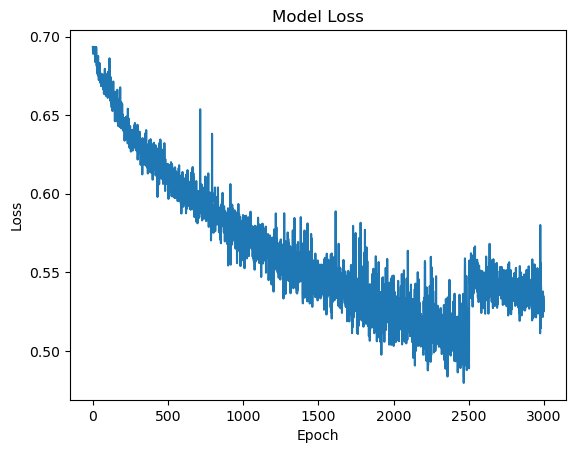

In [7]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [6]:
loss, accuracy = model.evaluate(X_test, Y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

157/157 [==============================] - 0s 2ms/step - loss: 0.7079 - accuracy: 0.6116
Test loss: 0.7079344987869263
Test accuracy: 0.6115999817848206
